In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("example").getOrCreate()

In [10]:
from pyspark.sql.functions import *


In [11]:
input_files="/home/labuser/Downloads/"

In [12]:
df=spark.read.json(f"{input_files}/constructors.json")

In [13]:
df.show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|                 url|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|http://en.wikiped...|
|            2|    bmw_sauber| BMW Sauber|     German|http://en.wikiped...|
|            3|      williams|   Williams|    British|http://en.wikiped...|
|            4|       renault|    Renault|     French|http://en.wikiped...|
|            5|    toro_rosso| Toro Rosso|    Italian|http://en.wikiped...|
|            6|       ferrari|    Ferrari|    Italian|http://en.wikiped...|
|            7|        toyota|     Toyota|   Japanese|http://en.wikiped...|
|            8|   super_aguri|Super Aguri|   Japanese|http://en.wikiped...|
|            9|      red_bull|   Red Bull|   Austrian|http://en.wikiped...|
|           10|   force_india|Force India|     Indian|http://en.wikiped...|
|           

In [14]:
df_final=df.withColumn("ingestion date",current_timestamp()).withColumn("path",input_file_name()).drop("url")

In [15]:
df_final.show()

+-------------+--------------+-----------+-----------+--------------------+--------------------+
|constructorId|constructorRef|       name|nationality|      ingestion date|                path|
+-------------+--------------+-----------+-----------+--------------------+--------------------+
|            1|       mclaren|    McLaren|    British|2023-09-22 05:37:...|file:///home/labu...|
|            2|    bmw_sauber| BMW Sauber|     German|2023-09-22 05:37:...|file:///home/labu...|
|            3|      williams|   Williams|    British|2023-09-22 05:37:...|file:///home/labu...|
|            4|       renault|    Renault|     French|2023-09-22 05:37:...|file:///home/labu...|
|            5|    toro_rosso| Toro Rosso|    Italian|2023-09-22 05:37:...|file:///home/labu...|
|            6|       ferrari|    Ferrari|    Italian|2023-09-22 05:37:...|file:///home/labu...|
|            7|        toyota|     Toyota|   Japanese|2023-09-22 05:37:...|file:///home/labu...|
|            8|   super_aguri|

In [19]:
df_final=df_final.drop("path")

In [23]:
output_files="/home/labuser/Downloads/Constructer_parquet"

In [24]:
df_final.write.parquet(f"{output_files}")

AnalysisException: [PATH_ALREADY_EXISTS] Path file:/home/labuser/Downloads/Constructer_parquet already exists. Set mode as "overwrite" to overwrite the existing path.

In [26]:
df_final.write.mode("overwrite").parquet(f"{output_files}")#need to change because we have overwrite

In [27]:
df_final.write.mode("overwrite").saveAsTable("constructor")

In [28]:
df_final.show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|      ingestion date|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|2023-09-22 05:49:...|
|            2|    bmw_sauber| BMW Sauber|     German|2023-09-22 05:49:...|
|            3|      williams|   Williams|    British|2023-09-22 05:49:...|
|            4|       renault|    Renault|     French|2023-09-22 05:49:...|
|            5|    toro_rosso| Toro Rosso|    Italian|2023-09-22 05:49:...|
|            6|       ferrari|    Ferrari|    Italian|2023-09-22 05:49:...|
|            7|        toyota|     Toyota|   Japanese|2023-09-22 05:49:...|
|            8|   super_aguri|Super Aguri|   Japanese|2023-09-22 05:49:...|
|            9|      red_bull|   Red Bull|   Austrian|2023-09-22 05:49:...|
|           10|   force_india|Force India|     Indian|2023-09-22 05:49:...|
|           

In [30]:
spark.sql("select * from constructor").show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|      ingestion date|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|2023-09-22 05:45:...|
|            2|    bmw_sauber| BMW Sauber|     German|2023-09-22 05:45:...|
|            3|      williams|   Williams|    British|2023-09-22 05:45:...|
|            4|       renault|    Renault|     French|2023-09-22 05:45:...|
|            5|    toro_rosso| Toro Rosso|    Italian|2023-09-22 05:45:...|
|            6|       ferrari|    Ferrari|    Italian|2023-09-22 05:45:...|
|            7|        toyota|     Toyota|   Japanese|2023-09-22 05:45:...|
|            8|   super_aguri|Super Aguri|   Japanese|2023-09-22 05:45:...|
|            9|      red_bull|   Red Bull|   Austrian|2023-09-22 05:45:...|
|           10|   force_india|Force India|     Indian|2023-09-22 05:45:...|
|           

In [29]:
spark.sql("select * from constructor where constructorId=10").show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|      ingestion date|
+-------------+--------------+-----------+-----------+--------------------+
|           10|   force_india|Force India|     Indian|2023-09-22 05:45:...|
+-------------+--------------+-----------+-----------+--------------------+



In [31]:
df_final.write.mode("overwrite").option("path","/home/labuser/Downloads/Constructer_parquet/construct_table").saveAsTable("constructor")

In [37]:
df_ps=spark.read.option("multiline","true").json("/home/labuser/Downloads/pitstop.json")

In [38]:
df_ps.show()

+--------+--------+---+------------+------+----+--------+
|driverId|duration|lap|milliseconds|raceId|stop|    time|
+--------+--------+---+------------+------+----+--------+
|     153|  26.898|  1|       26898|   841|   1|17:05:23|
|      30|  25.021|  1|       25021|   841|   1|17:05:52|
|      17|  23.426| 11|       23426|   841|   1|17:20:48|
|       4|  23.251| 12|       23251|   841|   1|17:22:34|
|      13|  23.842| 13|       23842|   841|   1|17:24:10|
|      22|  23.643| 13|       23643|   841|   1|17:24:29|
|      20|  22.603| 14|       22603|   841|   1|17:25:17|
|     814|  24.863| 14|       24863|   841|   1|17:26:03|
|     816|  25.259| 14|       25259|   841|   1|17:26:50|
|      67|  25.342| 15|       25342|   841|   1|17:27:34|
|       2|  22.994| 15|       22994|   841|   1|17:27:41|
|       1|  23.227| 16|       23227|   841|   1|17:28:24|
|     808|  24.535| 16|       24535|   841|   1|17:28:39|
|       3|  23.716| 16|       23716|   841|   1|17:29:00|
|     155|  24

In [42]:
df_ps.drop_duplicates().sort("driverID").show()

+--------+--------+---+------------+------+----+--------+
|driverId|duration|lap|milliseconds|raceId|stop|    time|
+--------+--------+---+------------+------+----+--------+
|       1|  23.199| 36|       23199|   841|   2|17:59:29|
|       1|  23.227| 16|       23227|   841|   1|17:28:24|
|       2|  22.994| 15|       22994|   841|   1|17:27:41|
|       2|  25.098| 30|       25098|   841|   2|17:51:32|
|       3|  23.716| 16|       23716|   841|   1|17:29:00|
|       4|  23.251| 12|       23251|   841|   1|17:22:34|
|       4|  24.733| 27|       24733|   841|   2|17:46:04|
|       5|  24.865| 17|       24865|   841|   1|17:31:11|
|      10|  23.792| 18|       23792|   841|   1|17:33:02|
|      13|  23.842| 13|       23842|   841|   1|17:24:10|
|      13|    24.5| 31|       24500|   841|   2|17:52:28|
|      15|  24.848| 37|       24848|   841|   2|18:03:55|
|      15|  24.899| 16|       24899|   841|   1|17:29:49|
|      16|  23.871| 37|       23871|   841|   2|18:02:15|
|      16|  25

In [44]:
df_ps.count()#.count here it is action as it displays  also

40

In [43]:
df_ps.groupBy("stop").count().show()#here .count is not  action because if we dont write.show then it is transformation as it dopesnt display anything  .read is a transformation

+----+-----+
|stop|count|
+----+-----+
|   1|   21|
|   3|    3|
|   2|   16|
+----+-----+



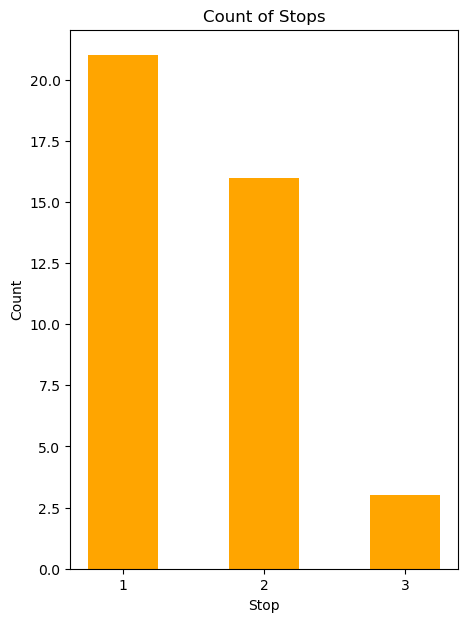

In [46]:
grouped_df = df_ps.groupBy('stop').count().orderBy('stop')
import matplotlib.pyplot as plt
pandas_df = grouped_df.toPandas()
plt.figure(figsize=(5,7))
plt.bar(pandas_df["stop"].astype(str), pandas_df["count"], color="Orange", width=0.5)
plt.xlabel("Stop")
plt.ylabel("Count")
plt.title("Count of Stops")
plt.show()

In [60]:
df_final.show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|      ingestion date|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|2023-09-22 06:59:...|
|            2|    bmw_sauber| BMW Sauber|     German|2023-09-22 06:59:...|
|            3|      williams|   Williams|    British|2023-09-22 06:59:...|
|            4|       renault|    Renault|     French|2023-09-22 06:59:...|
|            5|    toro_rosso| Toro Rosso|    Italian|2023-09-22 06:59:...|
|            6|       ferrari|    Ferrari|    Italian|2023-09-22 06:59:...|
|            7|        toyota|     Toyota|   Japanese|2023-09-22 06:59:...|
|            8|   super_aguri|Super Aguri|   Japanese|2023-09-22 06:59:...|
|            9|      red_bull|   Red Bull|   Austrian|2023-09-22 06:59:...|
|           10|   force_india|Force India|     Indian|2023-09-22 06:59:...|
|           

In [61]:
df_ps.write.mode("overwrite").option("path","/home/labuser/Downloads/Constructer_parquet/pitstop").saveAsTable("pistop")

In [62]:
spark.sql("select * from pistop").show()

+--------+--------+---+------------+------+----+--------+
|driverId|duration|lap|milliseconds|raceId|stop|    time|
+--------+--------+---+------------+------+----+--------+
|     153|  26.898|  1|       26898|   841|   1|17:05:23|
|      30|  25.021|  1|       25021|   841|   1|17:05:52|
|      17|  23.426| 11|       23426|   841|   1|17:20:48|
|       4|  23.251| 12|       23251|   841|   1|17:22:34|
|      13|  23.842| 13|       23842|   841|   1|17:24:10|
|      22|  23.643| 13|       23643|   841|   1|17:24:29|
|      20|  22.603| 14|       22603|   841|   1|17:25:17|
|     814|  24.863| 14|       24863|   841|   1|17:26:03|
|     816|  25.259| 14|       25259|   841|   1|17:26:50|
|      67|  25.342| 15|       25342|   841|   1|17:27:34|
|       2|  22.994| 15|       22994|   841|   1|17:27:41|
|       1|  23.227| 16|       23227|   841|   1|17:28:24|
|     808|  24.535| 16|       24535|   841|   1|17:28:39|
|       3|  23.716| 16|       23716|   841|   1|17:29:00|
|     155|  24

In [63]:
df=spark.read.parquet("/home/labuser/Downloads/Constructer_parquet/pitstop").show()

+--------+--------+---+------------+------+----+--------+
|driverId|duration|lap|milliseconds|raceId|stop|    time|
+--------+--------+---+------------+------+----+--------+
|     153|  26.898|  1|       26898|   841|   1|17:05:23|
|      30|  25.021|  1|       25021|   841|   1|17:05:52|
|      17|  23.426| 11|       23426|   841|   1|17:20:48|
|       4|  23.251| 12|       23251|   841|   1|17:22:34|
|      13|  23.842| 13|       23842|   841|   1|17:24:10|
|      22|  23.643| 13|       23643|   841|   1|17:24:29|
|      20|  22.603| 14|       22603|   841|   1|17:25:17|
|     814|  24.863| 14|       24863|   841|   1|17:26:03|
|     816|  25.259| 14|       25259|   841|   1|17:26:50|
|      67|  25.342| 15|       25342|   841|   1|17:27:34|
|       2|  22.994| 15|       22994|   841|   1|17:27:41|
|       1|  23.227| 16|       23227|   841|   1|17:28:24|
|     808|  24.535| 16|       24535|   841|   1|17:28:39|
|       3|  23.716| 16|       23716|   841|   1|17:29:00|
|     155|  24